# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Abhilash Mandlekar </font>

# Introduction

The aim for this assignment is to build the linear regression model and its both versions. That is to train the model by batch linear regression (Least Square - LS) method and online version (Least Mean Square -LMS). Since we use multiple features to train the data, it is also called as **Multiple Linear Regression**.<br>

The general equation for multiple linear regression is:   $ Y = W_0.X_0 + W_1.X_1 + W_2.X_2 + ... + W_n.X_n + Bias$ <br>
where **y** is the predicted value by linear regression model. $ X_0, X_1$ are the feature matrix and $ W_0, W_1$ are the weight matrix of the model.

I have trained the datasets by both LS as well as LMS methods so that we can compare its accuracy.

# Data

I am using the same dataset for linear regression as that used in my last assignment. The dataset is of "Rain in Australia" which is taken from kaggle. The dataset has total 23 features and has over 1 lakh rows which is used to predict the rain in mm. However, for this assignment I have considered only 15000 rows in dataset. 

The feature RISK_MM is the set of continuous values which gives the approximate value of the next day rain (in mm) and is the feature that we can predict using linear regression algorithm. If the value of RISK_MM is high (may be greater than 3 mm) it is said that the chances of rain on the next day is also high. This feature is dependant on many other features such as tempreature, humidity, pressure during the morning (9am) as well as in the afternoon (3pm). It also considers other features such as Sunshine, evaporation, windspeed and wind-direction.

The another important set of feature is ***Rainfall*** and ***RainToday*** which gives information about today's rainfall.

Tempreature is measured in degree centegrate, pressure in hpa, rainfall in mm, humidity is measured in percentage. The windspeed is measured in km per hr. The unit of measurement for clouds is "oktas".

### Reading the data

Since the data is in csv file, I have used pandas function read_csv to read the csv file for the dataset. This creates the dataframe which can directly be treated as the table and maintains the data in structured format. Here I have created a class that can be used to read the dataset for rain.


In [1]:
import numpy as np 
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import re 
import sys

import seaborn as sb

import collections

class ReadWeatherData():
    def weatherData(self, fname):
        df = pd.read_csv(fname)
        df = df.dropna()
        return df

In [2]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")

### Describe the data

In [3]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


### Visualization of data

#### 1. Distribution plot (Windspeed distribution)

We can see that the windspeed is normally distributed between the range of 0-120 km/hr. As we can see from the graph below, the mean of windspeed in this dataset is around 38 km/hr.

Dataframe is matrix of:  (56420, 23)


Text(0.5, 0, 'Wind speed in km/hr')

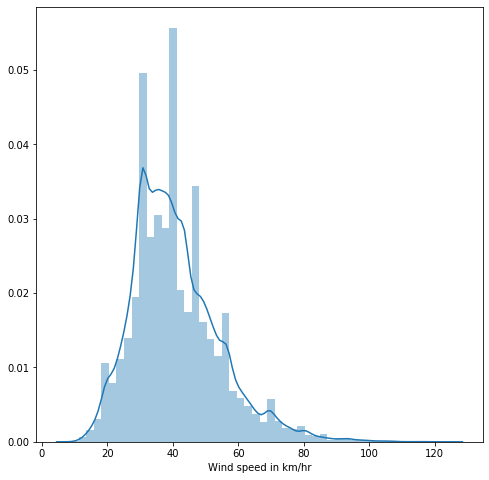

In [4]:
print("Dataframe is matrix of: ",rain_df.shape)
fig, ax = plt.subplots(figsize=(8,8))
sb.distplot(rain_df['WindGustSpeed'])
plt.xlabel("Wind speed in km/hr")

#### 2. Scatter plot ( Humidity % vs Rainfall in mm)

As the humidity percentage in air increases, it increases the rainfall. The same is shown in the scatter plot below.

We can clearly see that there are more datapoints plotted when the humidity in air is higher.

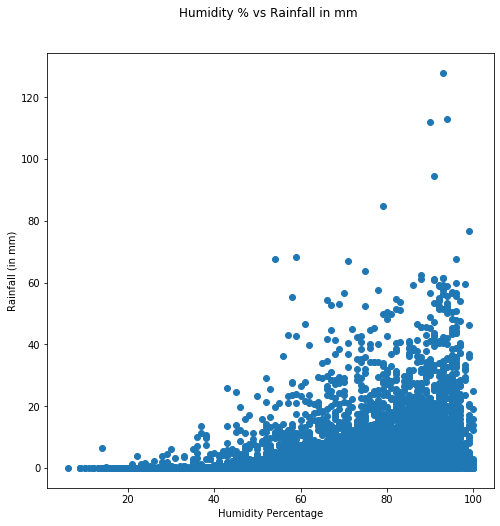

In [5]:
rain_df = rain_df[:15000]
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(rain_df['Humidity9am'], rain_df['Rainfall'])
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Humidity Percentage")
plt.title("Humidity % vs Rainfall in mm \n\n")
plt.show()

#### 3. Bar graph (Cities in Australia vs Rainfall in mm)

The bar graph below, shows the cities with the respective rainfall in mm.

The highest rainfall is recorded in city "CoffsHarbour" with more than 120 mm rainfall followed by city "More" having 110 mm of rainfall.

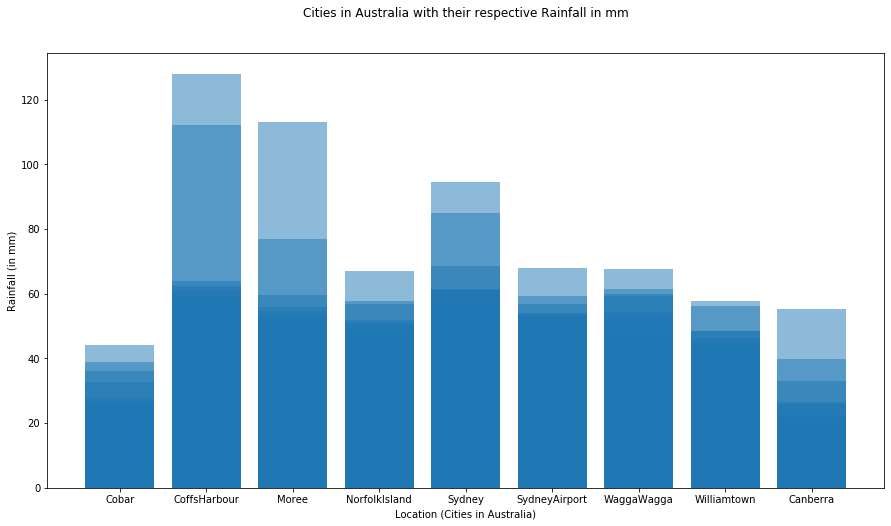

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(rain_df['Location'], rain_df['Rainfall'], alpha=0.5)
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Location (Cities in Australia)")
plt.title("Cities in Australia with their respective Rainfall in mm\n\n")
plt.show()

### Preliminary Observation

By looking at the above graphs we can make some general observations such as,<br>
1) the increase in humidity percentage in atmosphere increase the rainfall in mm (scatter plot 2)<br>
2) Rainfall Trends in Australia - we can clearly see the regions that has higher rainfall than in other regions. (Bar graph 3)<br>
3) The first distribution graph shows the wind speed in most of the dataset is near to 40 km/hr<br>

### Data Preprocessing

In this dataset, first I have directly droped the null values since I have lot many rows in the dataset. For LMS implementation I have normalized the data and scaled every feature between 0-1.

# Method

## Review of linear models

In this assignment we have two classes LinearRegress which implements the Least Squares algorithm and another class LMS which implements Least Mean Square algorithms.<br>

Let us review these two algorithms,<br>

### Least Square algorithm

It is a linear regression algorithm in which we pass the data for training at once. The paramter that gives the best fit is <br>
$$
w* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Here W is a weight matrix and it can be used to predict the values.<br>

We can also find the error of our trained model by finding the difference between the predicted value and the actual value. In python we can find the weights by using the formula:  w=(X.T*$X)^{-1}$*X.T*T <br>

Here X is the feature matrix and T are the target labels for the model. We also need to take the transpose of the matrix to match the dimensions for matrix multiplication.

### Least Mean Square algorithm

This is an online learning algorithm and we can calculte the weights of the model by iterating through the examples in the dataset. This can be done by using the proper learning rate alpha.

The advantage for using this algorithm is that, it can manage large datasets since only one example is in the memory at a certain time.

we can calculate the weights as<br>

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

when $k$ represents the steps for the repetition.

The value of alpha here should not very large as we may miss the optimal solution and it should not be very small beacause it will take longer time for the system to train.

### Explanation of Code

#### Least square 

We have an abstract class here called LinearModel() which has the implementation of some methods like check_matrix, add_ones which can be used directly in our code by calling those methods. The implementation of train and use is not given here hence the class remains abtract.<br>

The super class of this class is BaseModel() class and it is used everywhere in the assignment to initialize the weight matrix.
The method add_ones adds the vector of 1 before the actual features of matrix, that is it is used to add the bias. The method check_matrix is used to check if the matrix is 2d or not, it throughs the error if not so.

I have used the formula w=(X.T*$X)^{-1}$*X.T*T    to calculate the weights of matrix in python using numpy library.<br>

**Train Method** - In train method, I have first added the ones in feature matrix **X** and applied the formula shown above. The train method returns the calculated weight for the model which can be used in ***Use*** method later.

**Use Method** - First add ones to the input matrix **X** and then used the weights returned by train method. By using this method we can get the predicted values by the model.

The code below gives the implementation for these methods in LinearRegress() class.

### Super Classs Definition

In [7]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares 

In [8]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        rain_df = self.add_ones(X)
        self.w = np.linalg.inv(rain_df.T @ rain_df) @ rain_df.T @ T 
        return self.w
        pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w
        pass  ## TODO: replace this with your codes

### Least Mean Squares (Code explanation)

The LMS class also has the super class as LinearModel with implementation of methods like check_matrix, add_ones. It uses the instance of class BaseModel and hence the weight matrix gets initialize to None.
Here I have used the formula, 
$ w = w - alpha * (y - T) * X $<br>

This updates the weight matrix at every example by small value called as gradient. By getting the appropriate weights we can estimate the values accurately.

**Train Method** - Here I took batch size of 100 to train the large size of dataset. This function calls the train step function in batches of 100 examples.

**Train Step Method** - The above formula is used to train the model in this method. Every input to this function is a row of example with all the columns as features. It returns the weight for that examples updating the weights from its previous example.

**Use Method** - Use method uses the weights calculated by above methods. It returns the predicted values by the model by using the calculated weights.

In [9]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        batch_size = 100
        no_of_batches = np.ceil(X.shape[0]/batch_size)
        if(X.shape[0] < batch_size):
            for i in range(X.shape[0]):
                self.train_step(X[i], T[i])
        else:
            for j in range(int(no_of_batches)-1):
                prev = j*batch_size
                for i in range(j*batch_size, prev + batch_size):
                    self.train_step(X.iloc[i], T.iloc[i])
        return self.w
        ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        rain_df = np.hstack((1,x))
        rain_df = rain_df.reshape(1,rain_df.shape[0])
        if self.w is None:
            self.w = np.zeros((1,rain_df.shape[1]))
            
        #print("W shape",self.w.shape)
        #print("Rain df rain_df[0,:] ", rain_df[0,:].shape)
        y = self.w @ rain_df[0,:]
        grad = self.alpha * (y - t[0])
        self.w -= grad * rain_df[:] #t[:]
        #print(self.w)
        return self.w
        ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w.T
        ## TODO: replace this with your codes
        

### Usage Examples

In [10]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

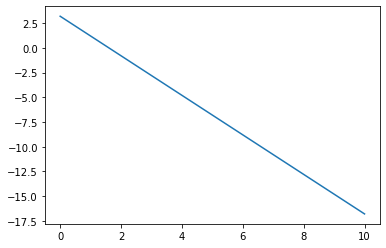

In [11]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

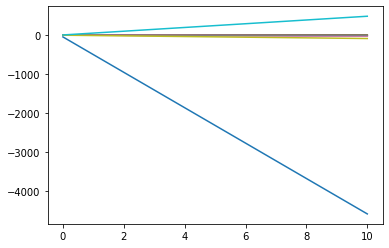

In [12]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

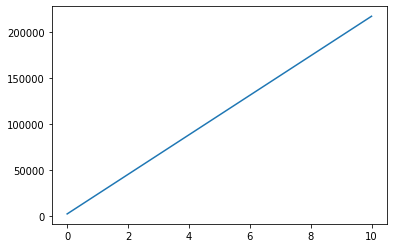

In [13]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

## Least square

Here I have loaded the dataset for "Rain in Australia" using the ReadWeaherData() class defined above. I have considered total 16 features to train the model it includes Tempreature, Pressure, Humidity, Clouds during morning and afternoon. It also considers features such as evaporation, sunshine and windspeed.

These features are loaded as numpy matrix and sent to the function created in LinearRegress() class. The method train is used to train the model, it takes the input the rain data.

I have printed the values of weight for each feature. We can use that matrix for prediction using least square method.
The rmse error for this dataset in LS algorithm is 1227.

In [14]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

In [15]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")
rain_df = rain_df.dropna()
df1 = rain_df.iloc[:,2:7]
df2 = rain_df.iloc[:,8]
df3 = rain_df.iloc[:,11:21]
df1 = df1.join(df2)
df1 = df1.join(df3)
rain_df_x = df1
#print(rain_df.head())
rain_df_target = rain_df.iloc[:,22:23]
rain_df = rain_df_x.join(rain_df_target)

#########################################################################
#print(rain_df.iloc[:5,0:16])
rain_df_x = rain_df.iloc[:,0:16]
rain_df_target = rain_df.iloc[:,16:17]

#print(rain_df_target[:5])

lr = LinearRegress()
#print(lr.train(rain_df_label, rain_df_target))
Wt_LS = lr.train(rain_df_x, rain_df_target)
#print(rain_df_x.shape)
print(Wt_LS)
#plt.scatter(rain_df_target,'.')
rain_df_x = np.hstack((np.ones((rain_df_x.shape[0], 1)), rain_df_x))
y = rain_df_x @ Wt_LS

#print(rain_df_target)
#print(y.shape)
#print(y[1:50])
#print(rain_df_target[1:50])
#print(rain_df_x[1:20] , rain_df_target[1:20])

#print(X @ Wt_LS)
print("LS RMSE error",rmse(rain_df_target,y))

      RISK_MM
0   41.804105
1   -0.092420
2    0.191797
3    0.251863
4    0.052277
5   -0.457208
6    0.131690
7   -0.012829
8   -0.106625
9   -0.009933
10   0.137863
11   0.471488
12  -0.521452
13  -0.144545
14  -0.027592
15  -0.001467
16   0.040023
LS RMSE error RISK_MM    1227.581794
dtype: float64


### Visualization of LS 

We can see the actual vs predicted values in the below graph.

Text(0.5, 1.0, 'Predicted vs Actual Rainfall for LS Implementation\n\n')

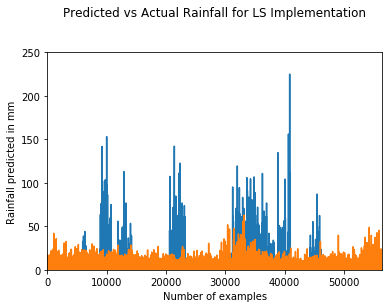

In [16]:
plt.plot(rain_df_target)
plt.plot(y)
plt.xlim([0,y.shape[0]])
plt.ylim([0,250])
plt.xlabel("Number of examples")
plt.ylabel("Rainfall predicted in mm")
plt.title("Predicted vs Actual Rainfall for LS Implementation\n\n")

## Least mean square (Online learing)

In this online learning algorithm, I have trained the model using alpha = 0.1 . The error rate changes upon changing the alpha.
This implemetation gives call to **train_step** which trains the model on every row of example.

Since weight matrix here updates at every step, it is always a good idea to normalize the data before calling the train method.
I have scaled all the features between 0-1 so that the optimal solution is reached early.

I have printed the matrix for Weights in LMS which can be used to predict the values and plot the graphs.

In [17]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")
rain_df = rain_df.dropna()
df1 = rain_df.iloc[:,2:7]
df2 = rain_df.iloc[:,8]
df3 = rain_df.iloc[:,11:21]
df1 = df1.join(df2)
df1 = df1.join(df3)
rain_df_x = df1
#print(rain_df.head())
rain_df_target = rain_df.iloc[:,22:23]
rain_df = rain_df_x.join(rain_df_target)

#########################################################################
#rain_df = np.hstack((np.ones((rain_df.shape[0], 1)), rain_df))
#print(rain_df.iloc[:5,0:16])
rain_df_x = rain_df.iloc[:,0:16]
rain_df_target = rain_df.iloc[:,16:17]

###################################
#Normalization of data
df_norm_x = (rain_df_x - rain_df_x.mean()) / (rain_df_x.max() - rain_df_x.min())
df_norm_y = (rain_df_target - rain_df_target.mean()) / (rain_df_target.max() - rain_df_target.min())

#print(df_norm_x[200])
#print(df_norm_y[200])

lms = LMS(0.1)
#W_trainStep = lms.gen_random_weight(df_norm_x)
Wt_Lms = lms.train(df_norm_x, df_norm_y)
print("weight lms ", Wt_Lms)

df_norm_x = np.hstack((np.ones((df_norm_x.shape[0], 1)), df_norm_x))
y = df_norm_x @ Wt_Lms.T


weight lms  [[ 0.01098305 -0.00723542 -0.00720578  0.01811945  0.01721722 -0.04508717
   0.09825334 -0.03189306 -0.01380748 -0.0139441   0.05439912  0.03430601
  -0.10003993 -0.00517649  0.00501469 -0.00133796 -0.02631805]]


### Visualization of LMS 

RISK_MM    6.996651
dtype: float64


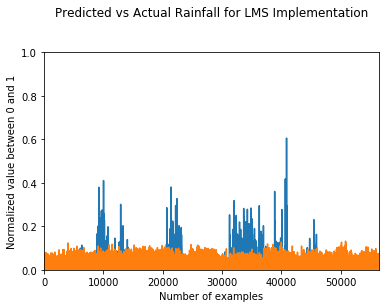

In [18]:
plt.plot(df_norm_y)
plt.plot(y)
plt.xlim([0,y.shape[0]])
plt.ylim([0,1])
plt.xlabel("Number of examples")
plt.ylabel("Normalized value between 0 and 1")
plt.title("Predicted vs Actual Rainfall for LMS Implementation\n\n")
print(rmse(df_norm_y,y))

### Comparison of algorithms

Since Least square is batch algorithm and the Least mean square is online algorithm, both the algorithm serves different purposes. There is no need to re-train the model in case Least mean square algorithm since weight of model is calculated on every row of data. For this we need to consider the proper alpha as a learning rate for our model.<br>

On the other hand, Least square implemetation takes all the data as input as once and hence the previous model can no-longer be used for the new data. In my case, since I have normalized the data in LMS implementation, the error rate diminished considerably.

The above two graphs compares these two algorithms well.

# Conclusions

I have learnt how to train the linear regression model with more than 10 features in it. I get to learn about the different linear regression algorithms like LS & LMS and about their performance on real-time data.<br>

I also learnt about finding the good features to be selected for the model and its implact on model.

# References

Young, Joe. “Rain in Australia.” Kaggle, 3 Dec. 2018, https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

Sungkwan Youm, Eui-Jik Kim “A Fast Probing Detection Method Using Hybrid Machine Learning Algorithms.” ACM Digital Library, ACM, https://dl.acm.org/citation.cfm?id=3326615&dl=ACM&coll=DL#.<br>

Class Note : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.Sol.ipynb

# Extra Credit



### Visualizing with Heatmap 

Here by plotting the heatmap we can clearly see the correlation between the different features.<br>
As Iam mainly interested in **Rainfall in mm**, we can check the Rainfall on x-axis and its co-relation with other features on Y-axis.

We can clearly see that it is negatively co-related with **pressure at 3pm** and **pressure at 9am**. Also the feature **Evaporation** has a less value for correlation coefficient. Hence we can safely remove these features from our model. 

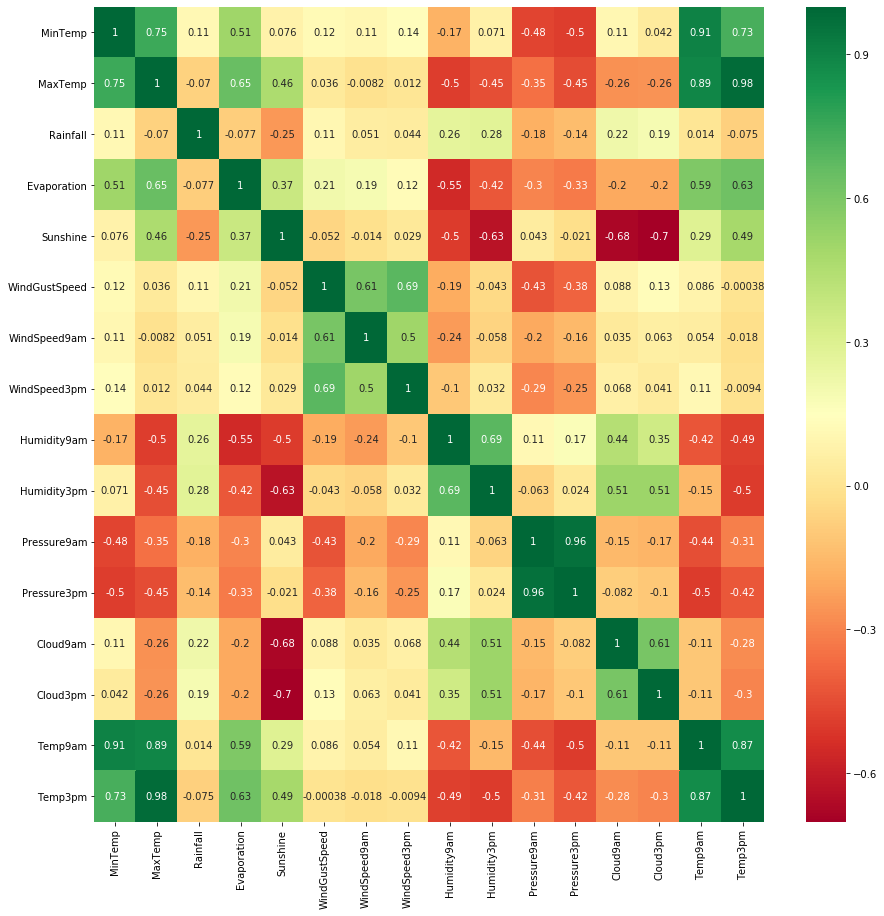

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(rain_df_x.corr(), annot=True, cmap="RdYlGn")

The code below removes the features **pressure at 9am, pressure at 3pm and Evaporation.** and calculates the rmse error.

In [20]:
rwd = ReadWeatherData()
rain_df = rwd.weatherData("weatherAUS.csv")
rain_df = rain_df.dropna()
df1 = rain_df.iloc[:,2:7]
df2 = rain_df.iloc[:,8]
df4 = df3.iloc[:,0:4]

df5 = df3.iloc[:,6:10]

df1 = df1.join(df2)
df1 = df1.join(df4)
df1 = df1.join(df5)
rain_df_x = df1
rain_df_target = rain_df.iloc[:,22:23]
rain_df = rain_df_x.join(rain_df_target)
rain_df = rain_df.dropna()

rain_df_x = rain_df.iloc[:,0:14]
rain_df_target = rain_df.iloc[:,14:15]


lr = LinearRegress()
#print(lr.train(rain_df_label, rain_df_target))
Wt_LS = lr.train(rain_df_x, rain_df_target)
#print(rain_df_x.shape)
print(Wt_LS)
#plt.scatter(rain_df_target,'.')
rain_df_x = np.hstack((np.ones((rain_df_x.shape[0], 1)), rain_df_x))
y = rain_df_x @ Wt_LS

#print(rain_df_target)
#print(y.shape)
#print(y[1:50])

#print(X @ Wt_LS)
print("LS RMSE error",rmse(rain_df_target,y))


     RISK_MM
0  -9.794569
1  -0.142891
2   0.160105
3   0.245330
4   0.014184
5  -0.505588
6   0.138772
7  -0.023055
8  -0.103330
9  -0.019355
10  0.153065
11 -0.163658
12 -0.041878
13 -0.052476
14  0.252956
LS RMSE error RISK_MM    1223.562974
dtype: float64


We can see that the RMSE error for the model decreased slightly from 1227 to 1223. Hence removing these features affacted the model positively.

#### Residual plot after removing features

Lets plot the residual graph for the target value and the predicted once. We can see from the below graph that the rmse is decreased. Also the predicted and the actual values are almost similar.

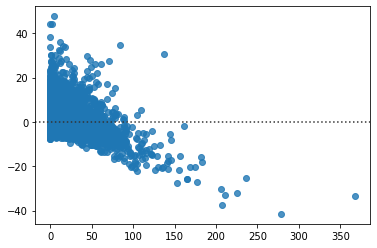

In [21]:
sb.residplot(rain_df_target, y, label="Residual plot for Rain data in Australia")

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [22]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
